# Experiment of Hybrid scheme for Brownian semistationary processes

* **Weiyi Chen**, weiyi.chen@baruchmail.cuny.edu
* **Rongxin Yu**, rongxin.yu@baruchmail.cuny.edu
* **Wenbo Zhang**, wenbo.zhang@baruchmail.cuny.edu

Department of Mathematics, Baruch College, CUNY.

### Abstract

In this report, we implement the hybrid scheme for Brownian semistationary processes, which is an approximation of the process via discretizing the stochastic integral representation of the process in the time domain, and it is a combination of Wiener integrals of the power function and a Riemann sum. We exemplify the use of the hybrid scheme by three numerical experiments, where we replicate the study of Monte Carlo option pricing in the rough Bergomi model of Bayer et al., analyze stability and sensitivity of parameters of hybrid scheme on price, and calibrate the SPX volatility surface.

** Keywords: ** Stochastic simulation; discretization; Brownian semistationary process; stochastic volatility; regular variation; estimation; option pricing; rough volatility; volatility smile.

## 1. Introduction

###	1.1 Brownian semistationary processes

A $\mathcal{BSS}$ process $X$ is defined via the integral representation

\begin{equation}
      X(t) = \int_{-\infty}^{t} g(t-s)\sigma(s)dW(s)
\end{equation}

where $W$ is a two-sided Brownian motion providing the fundamental noise innovations, the amplitude of which is modulated by a stochastic volatility (intermittency) process $\sigma$ that may depend on $W$. This driving noise is then convolved with a deterministic kernel function $g$ that specifies the dependence structure of $X$. The process $X$ can also be viewed as a **moving average** of volatility modulated Brownian noise and setting σ(s) = 1, we see that **stationary Brownian moving averages** are nested in this class of processes.

<img src="http://www.probabilitycourse.com/images/chapter11/BM_b.png", width=600>

In the applications mentioned above, the case where X is not a semimartingale is particularly relevant. This situation arises when the kernel function $g$ behaves like a power-law near zero; more specifically, when for some $\alpha \in (-\frac{1}{2}, \frac{1}{2}) \setminus \{0\}$,

\begin{equation}
      g(x) \propto x^\alpha \text{ for small } x>0
\end{equation}

The case $\alpha = −1$ is important in statistical modeling of turbulence as it gives rise to processes that are compatible with Kolmogorov’s scaling law for ideal turbulence (Corcuera et al., 2013). Moreover, processes of similar type with $\alpha ≈ −0.4$ have been recently used in the context of option pricing as models of **rough volatility** (Bayer et al., 2015; Gatheral et al., 2014), see Sections 10.1 and 15.2 below. The case α = 0 would (roughly speaking) lead to a process that is a semimartingale, which is thus excluded. We formulate the relation (1.2) below rigorously using the theory of **regular variation** (Bingham et al., 1989), which plays a significant role in our subsequent arguments.

### 1.2 Hybrid scheme
    
In Bennedsen et al.'s paper, we study a new discretization scheme for $\mathcal{BSS}$ processes based on approximating the kernel function $g$ in the time domain. The starting point is the Riemann-sum discretization of (1.1). The Riemann-sum scheme builds on an approximation of $g$ using step functions, which has the pitfall of failing to capture appropriately the steepness of $g$ near zero. In particular, this becomes a serious defect under (1.2) when $\alpha \in (-\frac{1}{2}, 0)$. 
    
In hybrid scheme, the problem is mitigated by approximating $g$ using an appropriate power function near zero and a step function elsewhere. The resulting discretization scheme can be realized as a linear combination of Wiener integrals with respect to the driving Brownian motion $W$ and a Riemann sum, which is why called a **hybrid scheme**. The hybrid scheme is only slightly more demanding to implement than the Riemann-sum scheme and the schemes have the same computational complexity as the number of discretization cells tends to infinity.

### 1.3 Truncated Brownian semistationary process
    
It is useful to extend the hybrid scheme to a class of non-stationary processes that are closely related to $\mathcal{BSS}$ processes. This extension is important in connection with an application to the rough Bergomi model below. More precisely, we consider processes of the form

\begin{equation}
  Y(t) = \int_0^tg(t-s)\sigma(s)dW(s), t\le 0,
\end{equation}

where the kernel function $g$, volatility process $\sigma$ and driving Brownian motion $W$ are as before. We call $Y$ a truncated Brownian semistationary ($\mathcal{TBSS}$) process, as $Y$ is obtained from the $\mathcal{BSS}$ process $X$ by truncating the stochastic integral in (1.1) at $0$.

### 1.4 Implementation

To replicate the hybrid scheme implementation recipe from Bennedsen et al.'s paper, we perform the numerical experiment of Monte Carlo option pricing in the rough Bergomi stochastic volatility model of Bayer et al., in R. We use the hybrid scheme to simulate the volatility process in this model and we verify the resulting implied volatility smiles are indistinguishable from those simulated using a method that involves exact simulation of the volatility process. After verification we optimize the codes via vectorizing and utilize multiprocessing technique to accelerate Monte Carlo methods in Python.

### 1.5 Sensitivity Analysis

After replication, we perform further numerical experiment of sensitivity analysis on option pricing in the rough Bergomi stochastic volatility model of Bayer et al. Parameter values used in the rBergomi model include $S_0, \epsilon, \eta, \alpha, \rho$ listed on Bennedsen et al.'s paper. Parameter values used in Hybrid Scheme include number of periods $n$, the period index to separate the approximate power function near zero and the step function $\kappa$, and the time period unit $T$. And there are other parameter values coming from Monte Carlo method. We keep track of the option price by changing one of the parameter while keep other constant, to figure out the sensitivity of each parameter on option price.

### 1.6 Report Organization

The rest of this report is organized as follows. In Section 2 we recall the implementation of Hybrid Scheme for $\mathcal{BSS}$ process and introduce our initial assumptions for parameters, including the extension of the scheme to a class of truncated BSS processes, then proceed to option pricing under rough volatility. Section 3 briefly discusses the code structure with results, and presents the numerical experiments mentioned above. Section 4 contains discussing on computational complexity and implementation improvements from both theory perspective, i.e. vectorization programming, and technique perspective, i.e. multiprocessing. Finally, Section 5 presents the sensitivities of the experiment results.

## 2. Practical Implementation 

### 2.1 Numerical Recall

#### 2.1.1 Brownian semistationary process

Simulating the $\mathcal{BSS}$ process $X$ on the equidistant grid $ \{0, \frac{1}{n}, \frac{2}{n}, \dots, \frac{\lfloor nT \rfloor}{n} \} $ for some $T>0$ using the hybrid scheme entails generating

\begin{equation}
  X_n(\frac{i}{n}), i = 0, 1, \dots, \lfloor nT \rfloor.
\end{equation}
        
Provided that we can simulate the random variables

\begin{equation}
  \begin{split}
    W_{i,j}^n := \int_{\frac{i}{n}}^{\frac{i+1}{n}} (\frac{i+j}{n} - s) ^ \alpha dW(s),\ &i = -N_n, -N_n+1, \dots, \lfloor nT \rfloor, j = 1,\dots,\kappa \\
    W_{i}^n := \int_{\frac{i}{n}}^{\frac{i+1}{n}} dW(s),\ &i = -N_n, -N_n+1, \dots, \lfloor nT \rfloor \\
    \sigma_i^n := \sigma\left(\frac{i}{n}\right),\ &i = -N_n, -N_n+1, \dots, \lfloor nT \rfloor
  \end{split}
\end{equation}

We can compute $X_n$ via the formula

$$
X_n(\frac{i}{n}) = \check{X}_n(\frac{i}{n}) + \hat{X}_n (\frac{i}{n}) = \sum_{k=1}^{\kappa} L_g\left(\frac{k}{n}\right)\sigma_{i-k}^n W_{i-k,k}^n + \sum_{k=\kappa+1}^{N_n} g\left(\frac{b_k^*}{n}\right) \sigma_{i-k}^nW_{i-k}^n 
$$

In order to simulate (2.2), it is instrumental to note that the ($\kappa+1$)-dimensional random vectors

$$ \mathbf{W}_i^n = (W_i^n, W_{i,1}^n, \dots, W_{i, \kappa}^n), i = -N_n, N_n+1, \dots, \lfloor nT\rfloor-1 $$

are i.i.d. according to a multivariate Gaussian with mean zero and covariance matrix $\Sigma$ given by

\begin{equation}
  \begin{split}
    \Sigma_{1,1} &:= \frac{1}{n}, \\
    \Sigma_{1,j} &= \Sigma_{j,1} := \frac{(j-1)^{\alpha+1}-(j-2)^{\alpha+1}}{(\alpha+1)n^{\alpha+1}}, \\
    \Sigma_{j,j} &:= \frac{(j-1)^{2\alpha+1}-(j-2)^{2\alpha+1}}{(2\alpha+1)n^{2\alpha+1}}, \\
    \Sigma_{j,k} &:= \frac{1}{(j-k)(\alpha+1)n^{2\alpha+1}} \left[ \left[(j-1)(k-1)\right]^{\alpha+1} F_1\left(1,2(\alpha+1),\alpha+2,\frac{k-1}{k-j}\right) - \left[(j-2)(k-2)\right]^{\alpha+1} F_1\left(1,2(\alpha+1),\alpha+2,\frac{k-2}{k-j}\right) \right]
  \end{split}
\end{equation}
        
for $j,k=2,\dots,\kappa+1$ such that $j\neq k$, where $F_1$ stands for the **Gauss hypergeometric function**.

Thus, $\{\mathbf{W}_i^n\}_{i=-N_n}^{\lfloor nT \rfloor -1}$ can be generated by taking independent draws from the can be generated by taking independent draws from the multivariate Gaussian distribution $N_{\kappa+1}(\mathbf{0}, \Sigma)$. If the volatility process $\sigma$ is driven by a standard Brownian motion $Z$, correlated with $W$, say, one could reply on a factor decomposition 

$$ Z(t) := \rho W(t) + \sqrt{1-\rho^2} W_\bot (t), t\in\mathcal{R} $$
        
where $\rho \in [-1,1]$ is the correlation parameter and $\{W_\bot(t)\}t\in[0,T]$ is a standard Brownian motion independent of $W$. Then one would first generate $\{\mathbf{W}_n\}\lfloor nT\rfloor-1$, use (2.6) to generate $\{Z(\frac{i+1}{n}) - Z(\frac{i}{n})\}_{i=-N_n}^{\lfloor nT\rfloor-1}$ and employ some appropriate approximate method to produce $\{\sigma_i^n\}_{i=-N_n}^{\lfloor nT\rfloor-1}$ thereafter.

#### 2.1.2 Truncated Brownian semistationary process

In the case of the $\mathcal{TBSS}$ process $Y$, the observations $Y_n(\frac{i}{n}), i=0,1,\dots,\lfloor nT \rfloor$, given by the hybrid scheme can be computed via

\begin{equation}
        Y_n(\frac{i}{n}) = \sum_{k=1}^{\min(i,\kappa)}L_g(\frac{k}{n})\sigma_{i-k}^nW_{i-k,k}^n + \sum_{k=\kappa+1}^{i} g(\frac{b_k^*}{n}\sigma_{i-k}^nW_{i-k}^n),
\end{equation}

using the random vectors $\{\mathbf{W}_i^n\}_{i=0}^{\lfloor nT \rfloor-1}$ and random variables $\{\sigma_i^n\}_{i=0}^{\lfloor nT\rfloor-1}$.

In the hybrid scheme, it typically suffices to take $\kappa$ to be at most 3. Thus, in (2.3), the first sum $\check{X}(\frac{i}{n})$ requires only a negligible computational effort. By contrast, the number of terms in the second sum $\hat{X}(\frac{i}{n})$ increases as $n\rightarrow\infty$. It is then useful to note that

\begin{equation}
    \hat{X}(\frac{i}{n}) = \sum_{k=1}^{N_n} \Gamma_k \Xi_{i-k} = (\Gamma\star\Xi)_i
\end{equation}

where

\begin{equation}
    \begin{split}
      \Gamma_k := \begin{cases}
        0, k=1,2,\dots,\kappa \\
        g(\frac{b_k^*}{n}, k = \kappa+1,\kappa+2,\dots,N_n
      \end{cases}
      \Xi_k := \sigma_k^nW_k^n, k = -N_n, -N_n+1, \dots, \lfloor nT \rfloor - 1
    \end{split}
\end{equation}

and $\Gamma\star\Xi$ stands for the discrete convolution of the sequences $\Gamma$ and $\Xi$.
      

#### 2.1.3 Option pricing under rough volatility

We study Monte Carlo option pricing in the rough Bergomi (rBergomi) model of Bayer et al. In the rBergomi model, the logarithmic spot variance of the price of the underlying is modeled by a rough Gaussian process.

More precisely, the price of the underlying in the rBergomi model with time horizon $T > 0$ is defined, under an equivalent martingale measure identified with $\mathbb{P}$, as

\begin{equation}
    S(t) := S(0) \exp\left(\int_0^t\sqrt{v(s)}dZ(s)-\frac{1}{2}\int_0^tv(s)ds\right), t\in[0,T],
\end{equation}
      
using the spot variance process

\begin{equation}
    v(t) := \xi_0\exp\left(\eta\sqrt{2\alpha+1}\int_0^t(t-s)^\alpha dW(s) - \frac{\eta^2}{2}t^{2\alpha+1}\right), t\in[0,T].
\end{equation}
      
Above, $S(0) > 0$, $\eta > 0$ and $\alpha\in(-\frac{1}{2},0)$ are deterministic parameters, and $Z$ is a standard Brownian motion given by

\begin{equation}
    Z(t):=\rho W(t)+ \sqrt{1-rho^2} W_\bot(t), t\in[0,T],
\end{equation}
      
where $\rho \in (-1,1)$ is the correlation parameter and $\{W_\bot(t)\}_{t\in[0,T]}$ is a standard Brownian motion independent of $W$. The process $\{\xi_0(t)\}_{t\in[0,T]}$ is the forward variance curve, which we assume here to be flat, $\xi_0(t) = \xi > 0$ for all $t \in [0,T]$.
      
We aim to compute using Monte Carlo simulation the price of a European call option struck at $K > 0$ with maturity $T$, which is given by

\begin{equation}
    C(S(0), K, T) := \mathbb{E} [(S_T - K)^+]
\end{equation}
      
We use the hybrid scheme to simulate $Y$. As the hybrid scheme involves simulating increments of the Brownian motion $W$ driving $Y$, we can conveniently simulate the increments of $Z$, needed for the Euler discretization of $S$, using the representation (2.12).
      

### 2.2 Implementation in R code

#### 2.2.1 Covariance Matrix

We first implement the covariance matrix $\Sigma$, which is given by

\begin{equation}
  \begin{split}
    \Sigma_{1,1} &:= \frac{1}{n}, \\
    \Sigma_{1,j} &= \Sigma_{j,1} := \frac{(j-1)^{\alpha+1}-(j-2)^{\alpha+1}}{(\alpha+1)n^{\alpha+1}}, \\
    \Sigma_{j,j} &:= \frac{(j-1)^{2\alpha+1}-(j-2)^{2\alpha+1}}{(2\alpha+1)n^{2\alpha+1}}
  \end{split}
\end{equation}

Note we drop the case $\Sigma_{j,k}$ because we have assumed $\kappa = 0$ or $\kappa = 1$.

In [1]:
covMatrix <- function(n, kappa){
    
    # @summary: generate the covariance matrix
    # @param n: the distance between two points is 1/n
    # @param kappa: how many power low terms to include around zero

    sigma <- matrix(0, nrow=kappa+1, ncol=kappa+1)
    sigma[1,1] <- 1/n
    if(kappa > 0){
        for(j in 2:(kappa+1)){
            sigma[1, j] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
            sigma[j, 1] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
        }
        for(j in 2:(kappa+1)){
            for(k in 2:(kappa+1)){
                if(j==k){
                  sigma[j,k] <- ((j-1)^(2*alpha+1)-(j-2)^(2*alpha+1)) / ((2*alpha+1)*n^(2*alpha+1))
                }
            }
        }
    }
    return(sigma)
}

#### 2.2.2 Simulation

This part we will simulate the price. First step is to create $Y_n$,

$$
Y_n(\frac{i}{n}) = \sum_{k=1}^{\min(i,\kappa)}L_g(\frac{k}{n})\sigma_{i-k}^nW_{i-k,k}^n + \sum_{k=\kappa+1}^{i} g(\frac{b_k^*}{n}\sigma_{i-k}^nW_{i-k}^n),
$$

where the left part is implemented as $Y1$ and the right part is implemented as $Y2$ in codes respectively.

Second step is to simulate spot variance process

\begin{equation}
    v(t) := \xi_0\exp\left(\eta\sqrt{2\alpha+1}\int_0^t(t-s)^\alpha dW(s) - \frac{\eta^2}{2}t^{2\alpha+1}\right), t\in[0,T].
\end{equation}

Note we drop the last element of created array and insert $xi$ as the first element to make it respect to the filtration, or not use any future information.

The final step is to generate price process

$$
S(t) := S(0) \exp\left(\int_0^t\sqrt{v(s)}dZ(s)-\frac{1}{2}\int_0^tv(s)ds\right), t\in[0,T],
$$

In [2]:
library(MASS)

Simulation <- function(n, kappa, T, W, Z, Gamma, tseq){
    
    # @summary: simulate the price process
    # @param n: the distance between two points is 1/n
    # @param kappa: how many power low terms to include around zero
    # @param T: the length of time steps
    # @param W & Z: Two standard Brownian motions W and Z, with rho correlated
    
    if(kappa==0){Y2 <- convolve(Gamma, rev(W), type="open")[1:floor(n*T)]}
    else{Y2 <- convolve(Gamma, rev(W[,1]), type="open")[1:floor(n*T)]}

    Y1 <- rep(0, floor(n*T))

    for(i in 1:floor(n*T)){
      Y1[i] <-0
      if (kappa!=0 ){
        for (k in 1:min(i,kappa)){
          Y1[i] = Y1[i] + W[i+1-k,k+1]
        }
      }
    }
    Y <- Y1+Y2 ## The simulated series of main interst
    v <- xi*exp(eta*sqrt(2*alpha+1)*Y - tseq)
    v <- c(xi, v[1:length(v)-1])
    S <- S0 * exp(sum(v^0.5*Z) - 1/2*sum(v)/n)
    return(S)
}

#### 2.2.3 Other Unitilies

There are some other utilities function which would be used in calculation, this section will list them -

The first one is the discrete convolution of the sequences $\Gamma$ and $\Xi$, which was shown as

\begin{equation}
    \hat{X}(\frac{i}{n}) = \sum_{k=1}^{N_n} \Gamma_k \Xi_{i-k} = (\Gamma\star\Xi)_i
\end{equation}

and implemented as

In [3]:
bstar <- function(k, alpha){
  result <- ((k^(alpha+1) - (k-1)^(alpha+1)) / (alpha+1)) ^ (1/alpha)
  return(result)
}

We would need Black Scholes functions to derive BS price and calculate implied volatilities, as we have codes from Volatility Surface lectures, and this is not a relavant part of this project so we will import through files to be consistent and brief - 

In [4]:
source("BlackScholes.R")

And some utilities functions to derive a list of implied volatilities given a list of strikes,

In [5]:
impvol <- function(k, st, T){
  payoff <- (st > exp(k)) * (st - exp(k))
  return(BSImpliedVolCall(1, exp(k), T, 0, mean(payoff)))
}

vol <- function(k, finalP){sapply(k, function(x){impvol(x, finalP, T)})}

#### 2.2.4 Hybrid Scheme

With the previous three parts, we are able to wrap our hybrid scheme function as below, we specify the model parameters when calling `hybridScheme()` method

In [6]:
library (parallel)

hybridScheme <- function(params){
  
  S0 <- params$S0
  xi <- params$xi
  eta <- params$eta
  alpha <- params$alpha
  rho <- params$rho
  
    covMatrix <- function(n, kappa){
        sigma <- matrix(0, nrow=kappa+1, ncol=kappa+1)
        sigma[1,1] <- 1/n
        if(kappa > 0){
            for(j in 2:(kappa+1)){
                sigma[1, j] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
                sigma[j, 1] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
            }
            for(j in 2:(kappa+1)){
                for(k in 2:(kappa+1)){
                    if(j==k){
                      sigma[j,k] <- ((j-1)^(2*alpha+1)-(j-2)^(2*alpha+1)) / ((2*alpha+1)*n^(2*alpha+1))
                    }
                }
            }
        }
        return(sigma)
    }
  
    Simulation <- function(n, kappa, T, W, Z, Gamma, tseq){
        if(kappa==0){Y2 <- convolve(Gamma, rev(W), type="open")[1:floor(n*T)]}
        else{Y2 <- convolve(Gamma, rev(W[,1]), type="open")[1:floor(n*T)]}
        Y1 <- rep(0, floor(n*T))
        for(i in 1:floor(n*T)){
          Y1[i] <-0
          if (kappa!=0 ){
            for (k in 1:min(i,kappa)){
              Y1[i] = Y1[i] + W[i+1-k,k+1]
            }
          }
        }
        Y <- Y1+Y2 ## The simulated series of main interst
        v <- xi*exp(eta*sqrt(2*alpha+1)*Y - tseq)
        v <- c(xi, v[1:length(v)-1])
        S <- S0 * exp(sum(v^0.5*Z) - 1/2*sum(v)/n)
        return(S)
    }
  
  MC <- function(N, n, kappa, T){
    Gamma <- sapply(seq(1:floor(n*T)), function(x){(bstar(x, alpha)/n)^alpha}) 
    if(kappa!=0) {Gamma[1:kappa] <- 0}
    tseq <- eta*eta/2*sapply(seq(1:floor(n*T)),function(x){(x/n)^(2*alpha+1)})
    steps <- floor(n*T)
    W <- mvrnorm(steps*N, mu=rep(0, kappa+1), Sigma=covMatrix(n, kappa))
    Wperp <- rnorm(steps*N, sd=sqrt(1/n))
    Z <- rho * W[,1] + sqrt(1-rho*rho)*Wperp
    return(unlist(mclapply(seq(1:N), function(loopNum){Simulation(
      n, kappa, T, W[(1+(loopNum-1)*steps):(loopNum*steps),],Z[(1+(loopNum-1)*steps):(loopNum*steps)], Gamma, tseq)}, mc.cores=4)))
  }
  return(MC)
}

Note the hybrid scheme function also has Monte Carlo Simulation Method implemented. The design of Hybrid Scheme is aiming at speeding up the process, here are some bullet points of our improved design: 

* Generated all the random numbers at one time, in order not to repeat duplicated random number generation inside the simulation
* Calculated constant sequences once only, same purpose as avoid duplicated calculations
* Replaced the naive convolution in paper, instead using FFT convolution, which reduces time complexity from $O(n^2)$ to $O(\log(n))$
* Introduced parallel techniques in monte carlo simulation, the speed improvement would depend on the number of CPUs on the running computer. If running on Baruch HPC with maximum number of CPUs around 1000, the speed could be 1000 times faster.

#### 2.2.5 Test

As the numerical process is implemented, we will give a test here to suggest how to use it, and also test its speed.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4337  0.9774  1.0050  1.0000  1.0290  1.9960 

   user  system elapsed 
  9.933   0.357   5.121 

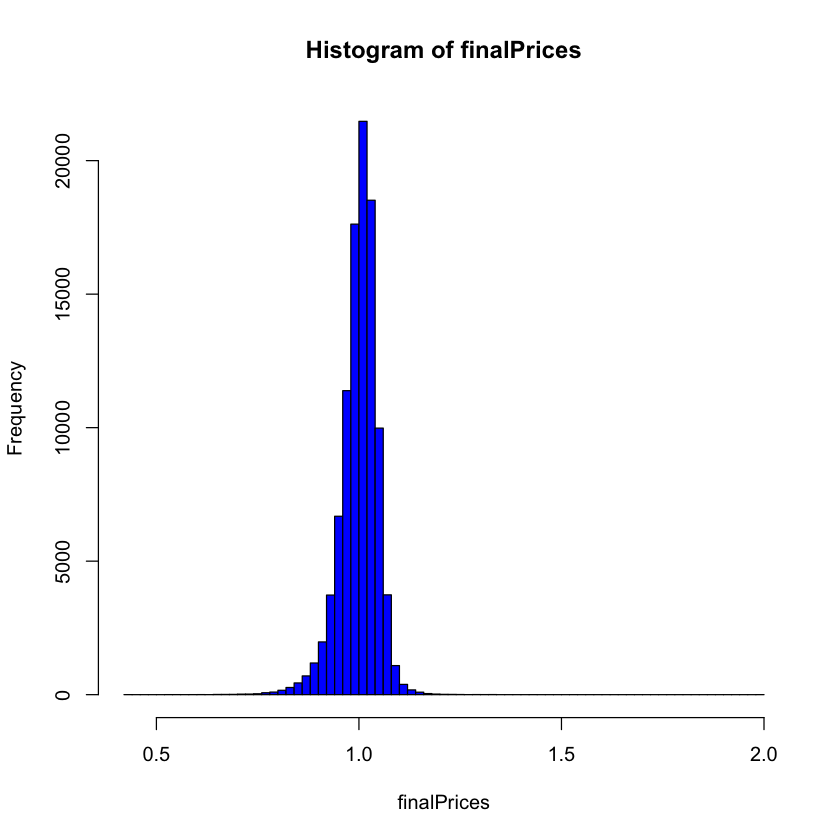

In [7]:
t0<-proc.time()

params <- list(S0=1, xi=0.235^2, eta=1.9, alpha=-0.43, rho=-0.9)
finalPrices <- hybridScheme(params)(N=1e5, n=100, kappa=1, T=0.041)
hist(finalPrices, col='blue', breaks=100)
summary(finalPrices)

proc.time()- t0

We plot the distribution of `finalPrices` above, it's nearly symmetric and the mean of price is roughly $1.0$, both of which verified our implementation in some aspects.

The running time is less than $12$ seconds, with $10^5$ Monte Carlo paths and $10^2$ number of time steps, or in other words with size $10^7$.

## 3. Numerical experiment

### 3.1 Option pricing under rough volatility

As the first experiment, we study Monte Carlo option pricing in the rough Bergomi (rBergomi) model of Bayer et al. (2015). In the rBergomi model, the logarithmic spot variance of the price of the underlying is modeled by a rough Gaussian process, which is a special case. By virtue of the rough volatility process, the model fits well to observed implied volatility smiles (Bayer et al., 2015, pp. 15-9).

##### Parameters values used in the rBergomi model:

| $S_0$ | $\xi$ | $\eta$ | $\alpha$ | $\rho$ |
|:--------:|:-----:|:------:|:--------:|:------:|
| $1$ | $0.235^2$ | $1.9$ | $-0.43$ | $-0.9$ |

We map the option price $C(S(0),K,T)$ to the corresponding Black-Scholes implied volatility $IV(S(0),K,T)$, see, e.g., Gatheral (2006). Reparameterizing the implied volatility using the log-strike 

$$k := \log(\frac{K}{S_0})$$ 

allows us to drop the dependence on the initial price, so we will abuse notation slightly and write $IV(k,T)$ for the corresponding implied volatility. The figure below displays implied volatility smiles obtained from the rBergomi model using the hybrid and Riemann-sum schemes to simulate Y , as discussed above, and compares these to the smiles obtained using an exact simulation of Y via Cholesky factorization. The parameter values are given in Table 1. 

They have been adopted from Bayer et al. (2015), who demonstrate that they result in realistic volatility smiles. We consider two different maturities: "small", $T = 0.041$, and "large", $T = 1$.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4818  0.9772  1.0050  0.9999  1.0290  1.6030 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6269  0.9798  1.0050  1.0000  1.0260  1.1420 

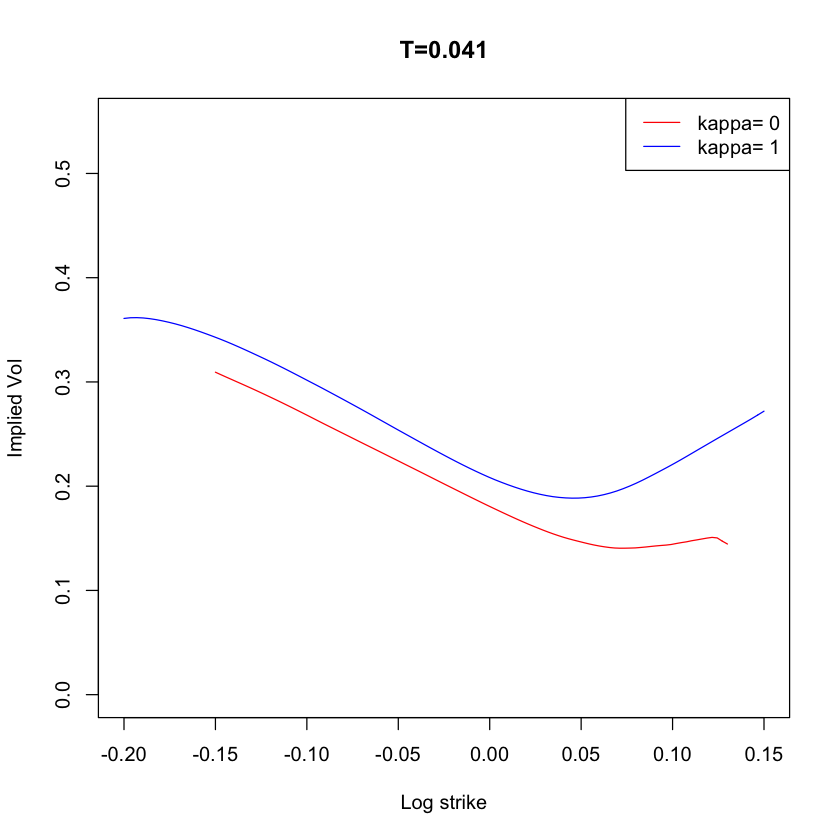

In [8]:
params <- list(S0=1, xi=0.235^2, eta=1.9, alpha=-0.43, rho=-0.9)
T <- 0.041
n <- 100 # step length is 1/n
paths <- 1e5
set.seed(9081)

# kappa=1
finalPrices <- hybridScheme(params)(paths, n, 1, T) 
summary(finalPrices)

# kappa=0
finalPrices2<- hybridScheme(params)(paths, n, 0, T) 
summary(finalPrices2)

curve(vol(x, finalPrices), from=-0.2, to=0.15, col='blue', xlab="Log strike", ylab="Implied Vol", ylim= c(0, 0.55))
curve(vol(x, finalPrices2),from=-0.15, to=0.13, add=TRUE, col='red')
legend('topright', legend= c('kappa= 0', 'kappa= 1'), col= c('red', 'blue'), lty=1)
title(main = 'T=0.041')

Implied volatility smiles computed using Monte Carlo simulation ($10^5$ replications), with maturity T = 0.041. The spot variance process v was simulated using an exact method, the hybrid scheme ($\kappa = 1$ and $\mathbf{b} = \mathbf{b}^*$) and Riemann-sum scheme ($\kappa = 0$ and $\mathbf{b} = \mathbf{b}^*$ ). The parameter values used in the rBergomi model are given in above Table.* 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00692 0.89180 1.03200 0.99960 1.13700 2.37200 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02833 0.92330 1.03400 0.99980 1.11000 1.55700 

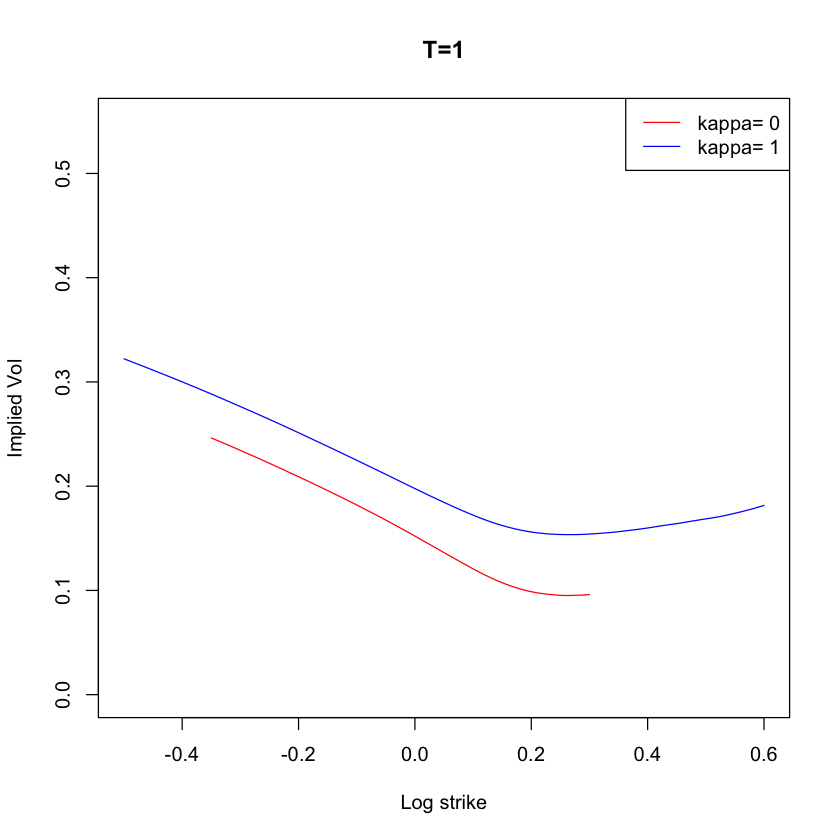

In [9]:
T<-1

# kappa=1
finalPrices3<- hybridScheme(params)(paths, n ,1, T) 
summary(finalPrices3)

# kappa=0
finalPrices4<- hybridScheme(params)(paths, n ,0, T) 
summary(finalPrices4)

curve(vol(x, finalPrices3), from=-0.5, to=0.6, col='blue', xlab="Log strike", ylab="Implied Vol", ylim= c(0, 0.55))
curve(vol(x, finalPrices4),from=-0.35, to=0.3, add=TRUE, col='red')
legend('topright', legend= c('kappa= 0', 'kappa= 1'), col= c('red', 'blue'), lty=1)
title(main = 'T=1')

Figure: Implied volatility smiles computed using Monte Carlo simulation ($10^5$ replications), with maturity T = 1. The spot variance process v was simulated using an exact method, the hybrid scheme ($\kappa = 1$ and $\mathbf{b} = \mathbf{b}^*$) and Riemann-sum scheme ($\kappa = 0$ and $\mathbf{b} = \mathbf{b}^*$ ). The parameter values used in the rBergomi model are given in above Table.* 

### 3.2 Sensitivity Analysis

A sensitivity analysis is used to determine how different values of hybrid scheme variables will impact volatility surface under a given set of assumptions. This technique would be used within specific boundaries that will depend on input variables.

The purpose of this section is a pre-step before SPX volatility surface calibration. Sensitivity analysis is a way to predict the outcome of a decision if a situation turns out to be different compared to the key prediction(s). This is very useful when attempting to determine the impact the actual outcome of a particular variable will have if it differs from what was previously assumed. By creating a given set of scenarios, we can determine how changes in one variable(s) will impact the target volatility curves.

#### 3.2.1 Sensitivity on $\xi$

The process $\{\xi_0(t)\}_{t\in[0,T]}$ is the so-called **forward variance curve** (Bayer et al., 2015, p. 11), which we assume here to be flat, $\xi_0(t) = \xi > 0$ for all $t ∈ [0,T]$.

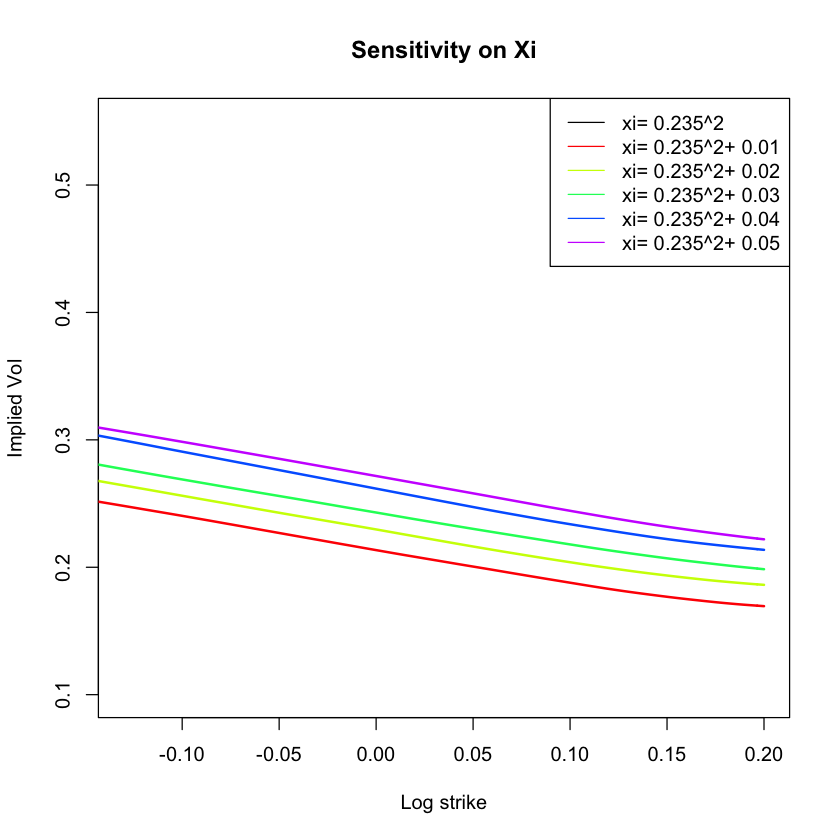

In [10]:
# params setting
T <- 1
paths <- 1e4
k <- 5
clr <- rainbow(k)
finalP <- list()

# simulation
for (i in 1:k){
  param <- params
  param$xi <- param$xi + 0.01*i  
  finalP[[i]]<- hybridScheme(param)(paths,n,1,T)
}

# plot
curve(vol(x, finalPrices), from=-0.13, to=0.2, col='black', xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.55) ,lwd=2)
for (i in 1:k){
    curve(vol(x, finalP[[i]]),from=-0.15, to=0.2, add=TRUE, col=clr[i], lwd=2)
}
legend('topright', legend=c(
    'xi= 0.235^2', 
    'xi= 0.235^2+ 0.01',
    'xi= 0.235^2+ 0.02',
    'xi= 0.235^2+ 0.03',
    'xi= 0.235^2+ 0.04',
    'xi= 0.235^2+ 0.05'), col = c('black', clr), lty=1)
title('Sensitivity on Xi')

#### 3.2.2 Sensitivity on $\alpha$

As mentioned above, $\alpha$ is considered in a kernel function that satisfies $g(x) \propto x^\alpha$ for some $\alpha \in (-0.5, 0.5) \setminus \{0\} $ 
when x > 0 is near zero.

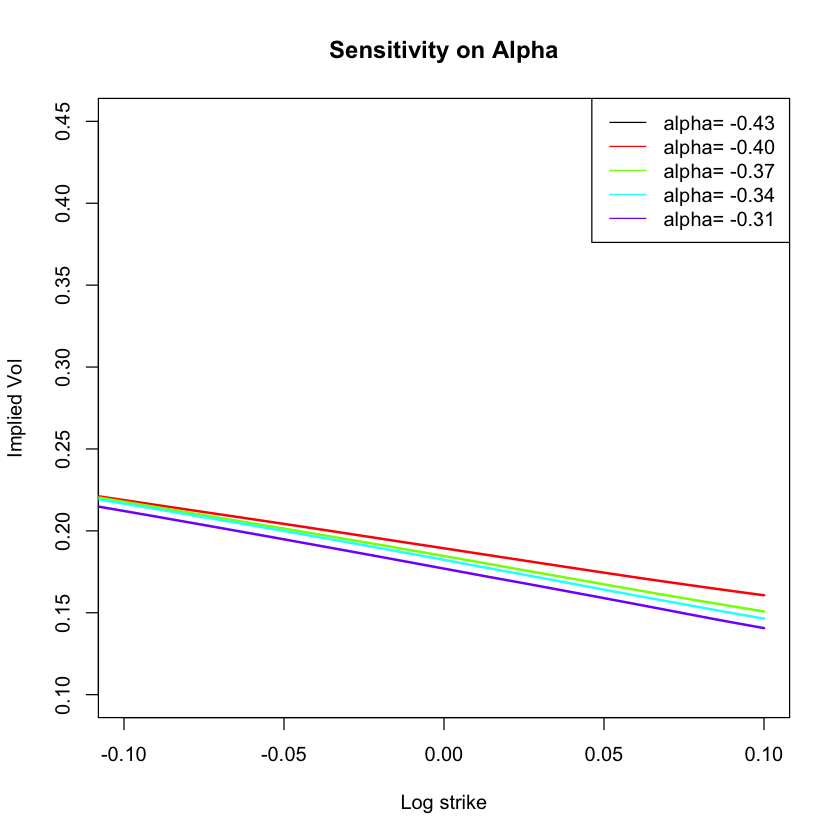

In [11]:
# params setting
k<-4
clr<- rainbow(k)
finalP<- list()

for (i in 1:k){
  param<- params
  param$alpha<- param$alpha+0.03*i
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}

curve(vol(x, finalPrices), from=-0.1, to=0.1, col='black', xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.45) ,lwd=2)
for (i in 1:k){
  curve(vol(x, finalP[[i]]),from=-0.18, to=0.1, add=TRUE, col=clr[i], lwd=2)
}

legend('topright', legend=c (
    'alpha= -0.43', 
    'alpha= -0.40',
    'alpha= -0.37',
    'alpha= -0.34',
    'alpha= -0.31'), col = c('black', clr), lty=1)
title( 'Sensitivity on Alpha')

#### 3.2.3 Sensitivity on $\eta$

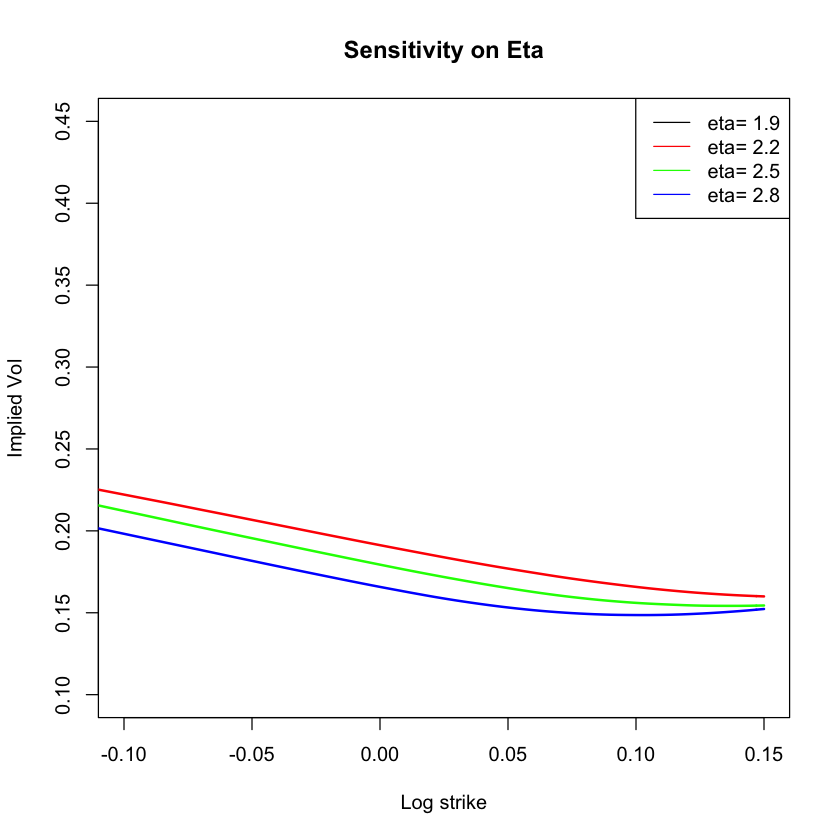

In [12]:
k<-3
clr<- rainbow(k)
finalP<- list()

for (i in 1:k){  
  param<- params
  param$eta<- param$eta+0.3*i
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}

curve(vol(x, finalPrices), from=-0.1, to=0.15, col='black', xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.45) ,lwd=2)
for (i in 1:k){
  curve(vol(x, finalP[[i]]),from=-0.15, to=0.15, add=TRUE, col=clr[i], lwd=2)
}
legend('topright', legend=c ('eta= 1.9', 'eta= 2.2', 'eta= 2.5', 'eta= 2.8'), col = c('black', clr), lty=1)
title( 'Sensitivity on Eta')

#### 3.2.4 Sensitivity on $\rho$

When $\rho < 0$,


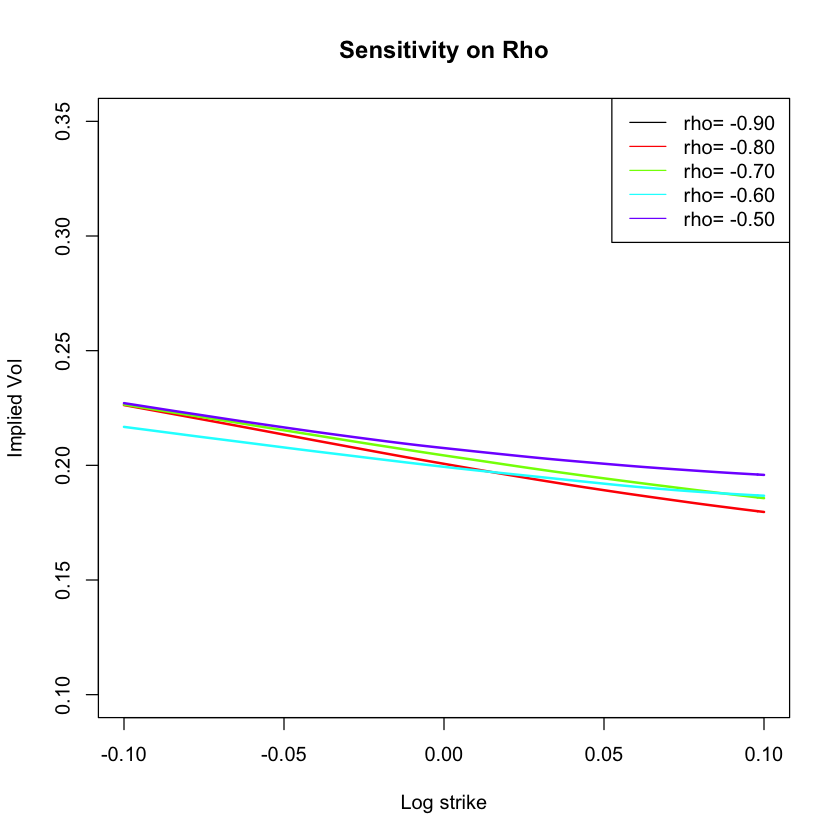

In [13]:
k<-4
clr<- rainbow(k)
finalP<- list()

for (i in 1:k){
  param<- params
  param$rho<- param$rho+0.1*i
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}
  
curve(vol(x, finalPrices), from=-0.1, to=0.1, col='black', xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.35) ,lwd=2)
for (i in 1:k){ curve(vol(x, finalP[[i]]),from=-0.1, to=0.1, add=TRUE, col=clr[i], lwd=2) }
legend('topright', legend=c ('rho= -0.90','rho= -0.80','rho= -0.70','rho= -0.60','rho= -0.50'), col = c('black', clr), lty=1)
title( 'Sensitivity on Rho')


When $\rho > 0$,



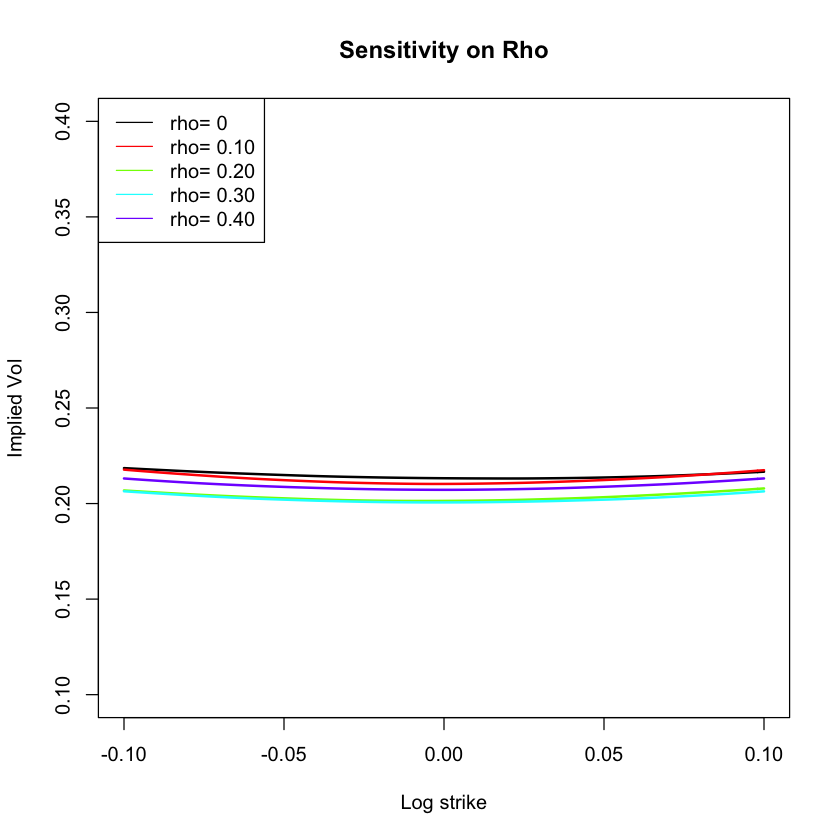

In [14]:
n<- 500
k<-4
clr<- rainbow(k)
finalP<- list()

params$rho<-0
finalPrices <- hybridScheme(params)(paths, n, 1, T)

for (i in 1:k){ 
 param<- params
 param$alpha<- param$alpha+0.1*i
 finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}

curve(vol(x, finalPrices), from=-0.1, to=0.1, col='black', xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.4) , xlim= c(-0.1, 0.1),lwd=2)
for (i in 1:k) { curve(vol(x, finalP[[i]]),from=-0.1, to=0.1, add=TRUE, col=clr[i], lwd=2) }

legend('topleft', legend=c ('rho= 0', 'rho= 0.10', 'rho= 0.20', 'rho= 0.30','rho= 0.40'), col = c('black', clr), lty=1)
title( 'Sensitivity on Rho')

### 3.3 S&P 500 Volatility Surface Calibration

#### 3.3.1 Volatility Surface Generation

##### Generating Implied Vols

* We source raw index option price data from OptionMetrics In this case, the data file is `spxOptionMetrics.rData`.
* We use the function `generateOptionMetricsIvols` from `optionMetricsToIVols.R` to generate `spxIvols050915`.
* We use the function `plotIvols` from `plotIvols.R` to plot the results.

```
   spxIvols050915  <- generateOptionMetricsIvols(spxData050915)
   plotIvols(spxIvols050915)
```

The raw OptionMetrics price data looks like this:

In [15]:
rm(list=ls())
load("../calibration/spxOptionMetrics.rData")
head(spxData050915)

secid     date symbol symbol_flag   exdate last_date cp_flag
545518 108105 20050915 SPB.FT           0 20060617  20050908       C
545519 108105 20050915 SPB.LT           0 20051217  20050809       C
545520 108105 20050915 SPB.RT           0 20060617  20050830       P
545521 108105 20050915 SPB.XT           0 20051217  20050902       P
545522 108105 20050915 SPL.FA           0 20070616        NA       C
545523 108105 20050915 SPL.FJ           0 20070616        NA       C
       strike_price best_bid best_offer volume open_interest optionid cfadj
545518      1600000      0.0        0.5      0            63 23785632     1
545519      1600000      0.0        0.5      0           170 23956762     1
545520      1600000    340.9      342.9      0           683 23785633     1
545521      1600000    361.5      363.5      0           705 23956761     1
545522       700000    538.3      541.3      0             0 26643070     1
545523       850000    406.1      409.1      0             0 26643074     1
       ss_flag root suffix ticker index_flag             issuer div_convention
545518       0  SPB     FT    SPX          1 CBOE S&P 500 INDEX              I
545519       0  SPB     LT    SPX          1 CBOE S&P 500 INDEX              I
545520       0  SPB     RT    SPX          1 CBOE S&P 500 INDEX              I
545521       0  SPB     XT    SPX          1 CBOE S&P 500 INDEX              I
545522       0  SPL     FA    SPX          1 CBOE S&P 500 INDEX              I
545523       0  SPL     FJ    SPX          1 CBOE S&P 500 INDEX              I
       exercise_style am_set_flag
545518              E           1
545519              E           1
545520              E           1
545521              E           1
545522              E           1
545523              E           1

Note that the strike prices are oiut by a factor of 1,000! So let's fix them:

In [16]:
spxData050915$strike_price <- spxData050915$strike_price/1000

##### Implied volatility computation for index options 

* We compute all implied volatilities from option price data
    * We don’t need external estimates of interest rates and dividends
* We use put-call parity to get implied forward prices and discount factors.
    * Find the unique forward price and discount factor that minimize implied forward pricing errors.
* In this way, we can avoid errors due to non-synchronous parameter estimates and typically generate very smooth implied volatility curves.

The resulting implied volatility output looks like this:

In [17]:
source("../calibration/optionMetricsToIvols.R")
spxIvols050915  <- generateOptionMetricsIvols(spxData050915)
spxIvols050915[30:50,]

Expiry        Texp Strike        Bid        Ask      Fwd     CallMid
30 20050917 0.005475702   1150         NA 0.37535440 1227.798          NA
31 20050917 0.005475702   1155         NA 0.32547806 1227.798          NA
32 20050917 0.005475702   1160 0.30490494 0.37678130 1227.798 67.95133827
33 20050917 0.005475702   1165         NA 0.32676025 1227.798          NA
34 20050917 0.005475702   1170 0.26360852 0.34657446 1227.798 58.00243316
35 20050917 0.005475702   1175 0.24285638 0.26499148 1227.798 52.87469594
36 20050917 0.005475702   1180 0.24263809 0.28715960 1227.798 48.00243316
37 20050917 0.005475702   1185         NA 0.23352259 1227.798          NA
38 20050917 0.005475702   1190 0.19745139 0.20977679 1227.798 37.92579083
39 20050917 0.005475702   1195 0.15864560 0.19484019 1227.798 32.92579083
40 20050917 0.005475702   1200 0.16142793 0.17666020 1227.798 28.00243316
41 20050917 0.005475702   1205 0.15018761 0.15579053 1227.798 23.07907550
42 20050917 0.005475702   1210 0.12791572 0.13656493 1227.798 18.15571784
43 20050917 0.005475702   1215 0.09898340 0.10967283 1227.798 13.18126528
44 20050917 0.005475702   1220 0.08676468 0.09128081 1227.798  8.51338207
45 20050917 0.005475702   1225 0.06220211 0.08685587 1227.798  4.33090031
46 20050917 0.005475702   1230 0.06835615 0.08318531 1227.798  1.78832116
47 20050917 0.005475702   1235 0.06703419 0.07488402 1227.798  0.43430657
48 20050917 0.005475702   1240 0.08106528 0.09051137 1227.798  0.20437956
49 20050917 0.005475702   1245 0.10671125 0.15155820 1227.798  0.43430657
50 20050917 0.005475702   1250 0.11062406 0.12265544 1227.798  0.07664234

Finally plot the smiles, below are the SPX implied volatility smiles corresponding to the output

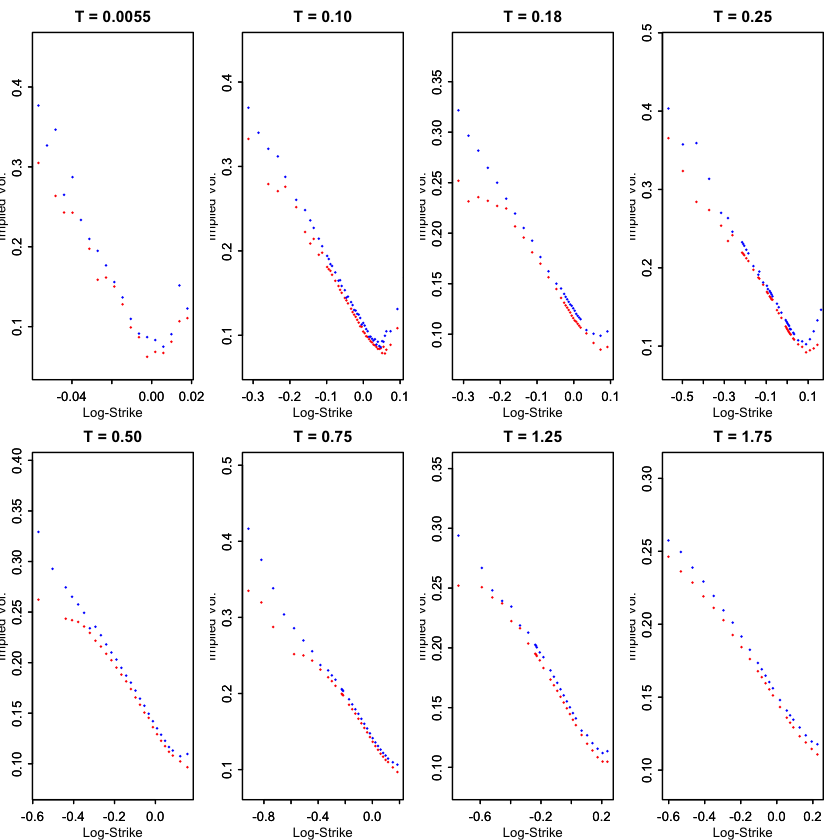

In [18]:
source("../calibration/plotIvols.R")
res05 <- plotIvols(spxIvols050915)

#### 3.3.2 Calibration (with comparison to SVI)

It’s hard to deny that this SVI fit is strikingly good. In Jim Gatheral's lecture, the SVI parameterization gives an arbitrage-free surface with very good fits to the data. We would like to achieve a similar fit for Hybrid Scheme using only simple code written in R.

** Fitting SVI slice-by-slice¶ **: Although fitting slice-by-slice is not a good idea, it would be a good start fitting to individual slice:

ERROR: Error in eval(expr, envir, enclos): could not find function "sviFit"


ERROR: Error: object 'fit0' not found


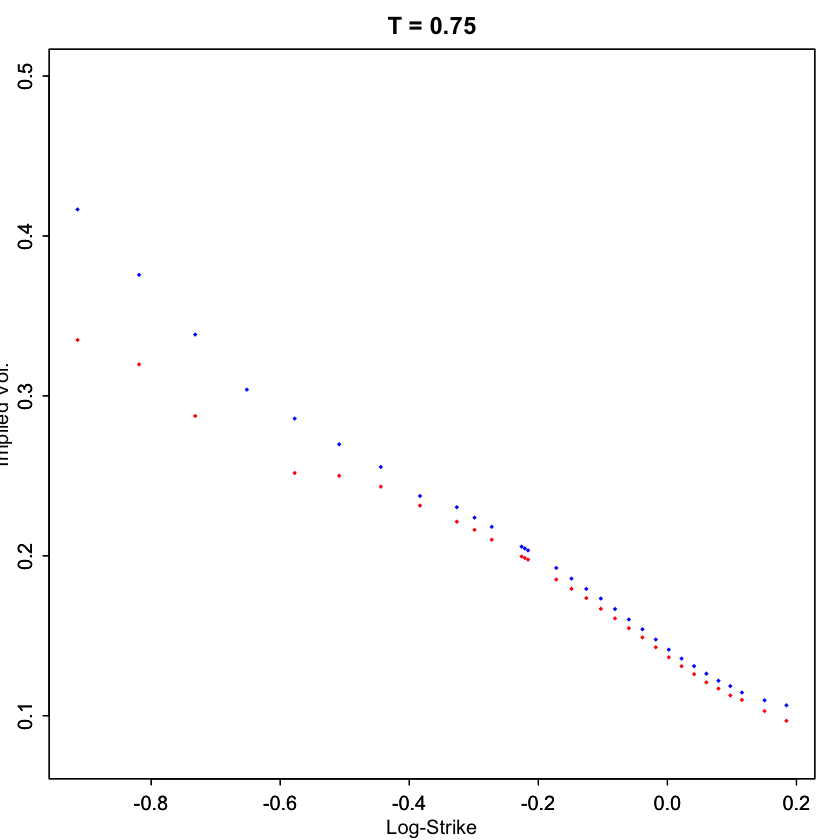

In [19]:
spxOptData <- spxIvols050915[233:264,]

# Fit each slice individually
fit0 <- sviFit(spxOptData)
plotIvols(spxOptData,fit0)

##### Fitting Hybrid Scheme slice-by-slice

We implemented functions `bssFit()` similar to `sviFit()`, `bss()` similar to `svi()` and customized plot function to `plotIvols_bss()`, as shown below.

In [22]:
source("../calibration/bss.R")

# Fit BSS independently to each slice

bssFit <- function(ivolData, paths, n, kappa=1){
  
  bidVols <- as.numeric(ivolData$Bid);
  askVols <- as.numeric(ivolData$Ask);
  expDates <- unique(ivolData$Texp);
  nSlices <- length(expDates);
  
  slices <- 1:nSlices;
  bssMatrix <- array(dim=c(nSlices,5));

  ######################################
  for (slice in slices){
    t <- expDates[slice];
    texp <- ivolData$Texp;
    bidVol <- bidVols[texp==t];
    askVol <- askVols[texp==t];
    pick <- (bidVol>0)&(askVol>0);
    pick <- !is.na(pick);
    midVar <- (bidVol[pick]^2+askVol[pick]^2)/2;
    f <- (ivolData$Fwd[texp==t])[1];
    k <- log(ivolData$Strike[texp==t]/f)[pick]; # Plot vs log-strike
    
    # Define objective function
    obj <- function(bssparams){
      # tmp1 <- as.list(bssparams);
      tmp1 <- list(S0=1.0, xi = mean(midVar,na.rm=T), eta= 2.236068,  rho = bssparams, alpha=-0.001); 
      names(tmp1) <- c("S0","xi","eta","rho","alpha")
      bssVar<- bss(tmp1, k, paths, n, kappa, t);
      tmp <- sum((midVar-bssVar)^2, na.rm=T);
      return(tmp*1e4);
    };
   
    # fit <- optim(bssGuess, obj);
    fit <- optimize(obj, c(-1, 1))

    # tmp1 <- as.list(fit$par)
    tmp1 <- list(S0=1.0, xi = mean(midVar,na.rm=T), eta= 2.236068,  rho = fit$minimum, alpha=-0.001); 
    
    # bssMatrix[slice,] <- tmp1 * c(1,1,1,1,1);
    bssMatrix[slice, ] <- unlist(tmp1);
    print(bssMatrix)

  }# end of for loop
  ######################################
  
  bssMatrix <- as.data.frame(bssMatrix);
  colnames(bssMatrix) <- c("S0","xi","eta","rho","alpha");
  return(bssMatrix);
}# end of function

Note that we can only utilize `optimize()` function to optimize one parameter at a time, because our variance calculation involves with Monte Carlo Method, rather than direct formula as SVI, it's hard to use `optim()` function to optimize all parameters together.

Below is an example of one-slice fit.

     [,1]       [,2]     [,3]       [,4]   [,5]
[1,]    1 0.04143912 2.236068 -0.6439132 -0.001


$expiries
[1] 0.752909

$atmVol
[1] 0.1395635

$atmSkew
[1] -0.3040462

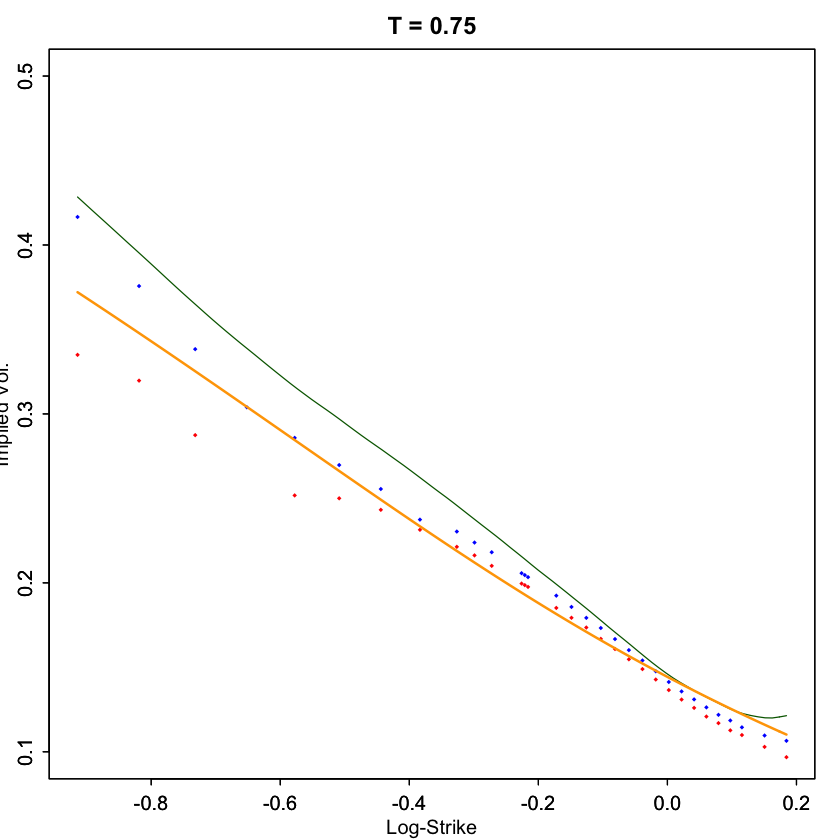

In [26]:
source('../calibration/hybrid_bss.R')
source('../calibration/sviFit0.R')
source('../calibration/svi.R')

set.seed(9081)
spxOptData <- generateOptionMetricsIvols(spxData050915)
spxOptData <- spxOptData[233:264, ]

paths<-2000
n<-100

svifit0 <- sviFit(spxOptData)
bssfit0 <- bssFit(spxOptData, paths, n, kappa=1)

plotIvols_BSS(ivolData=spxOptData, paths=paths, n=n, bssMatrix=bssfit0, kappa=1, sviMatrix=svifit0)

## 4. Conclusion and further steps

### 4.1 Result conclusion

We have implemented the hybrid scheme for Brownian semistationary processes in R, and we replicated the study of Monte Carlo option pricing in the rough Bergomi model of Bayer et al., analyzed stability and sensitivity of parameters of hybrid scheme on price, and calibrate the SPX volatility surface.

#### 4.1.1 Implementation of Hybrid Scheme

We have exactly cloned the process of Mikkel Bennedsen's paper, and improved the speed from different aspects - 

* 1. Mathematically, we have used faster FFT convolution method and generated random numbers at once.
* 2. Technically, we avoid any duplications of computations in codes, and also introduced R profiler to analyze our time distribution, as well as utilize parallel techniques to speed up Monte Carlo Simulation

#### 4.1.2 Study of rough Bergomi model

We have replicated the experiment from Mikkel Bennedsen's paper, and achieved the same result given the parameters used in the paper.

#### 4.1.3 Sensitivity analysis

As a pre-study before calibration experiment, we changed each parameter of hybrid scheme to analyze how volatility curves behave. After figuring out the impacts, we made a decision on the order of parameters in calibration.

#### 4.1.4 Calibration

We re-studied the SVI calibration, and try to replicate the process in Hybrid Scheme calibration, including fitting slice-by-slice, curve crossing elimination and arbitrage detection. But the main difference between these two model is that, SVI has an exact formula of variance, while Hybrid Scheme need to run Monte Carlo simulation to generate implied volatilities and then variance, which is the biggest difficulty in optimization on parameters since we don't have multiple-dimention optimization method to utilize, as in SVI.

However, we are still able to calibrate reasonable curves slice-by-slice.

### 4.2 Further steps

#### 4.2.1 Implementation of Hybrid Scheme

We were utilizing `Rporf()` to help improve speed, below is the profiler table before improving `convolve()` method - 

<img src='before.png', width=400>

and below is the profiler table after improving `convolve()` method - 

<img src='after.png', width=400>

A further step could be restructing `Simulatin()` method or rebuild `bstar()` method to see if possible to implement more vectorized computations.

#### 4.1.2 Study of rough Bergomi model

As the paper suggested $\kappa = 1$ is already good enough, so we skip the part when the value is larger. A next step here would be have those completed, though may be useless.

#### 4.1.3 Sensitivity analysis

After this analysis we found how the curve is changing with respect to each parameter, but we did not think carefully about the intuition. A further step could be go back to formula and figure out their intuitive impact, this might be helpful to construct a rough variance formula for hybrid scheme. If we have a close-form fomula of variance, we would be able to calibrate as fast and good as SVI too.

#### 4.1.4 Calibration

This part is not completed because of the difficulty of optimization, we could only do on one-dimention rather than multiple-dimention optimization, which creates problems on the order of parameter to calibrate and the upper/lower bound in optimization.
